In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Data Understanding

In [42]:
train = pd.read_csv('train.csv')
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [43]:
train.shape

(4250, 20)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [45]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


# Data Preparation

## Data Cleaning

In [46]:
data_stat = pd.DataFrame()
data_stat.index = train.columns
data_stat["unique_value"] = train.nunique()
data_stat["missing_rate"] = train.isna().mean()
data_stat["dtype"] = train.dtypes
data_stat

,unique_value,missing_rate,dtype
state,51,0.0,object
account_length,215,0.0,int64
area_code,3,0.0,object
international_plan,2,0.0,object
voice_mail_plan,2,0.0,object
number_vmail_messages,46,0.0,int64
total_day_minutes,1843,0.0,float64
total_day_calls,120,0.0,int64
total_day_charge,1843,0.0,float64
total_eve_minutes,1773,0.0,float64


In [47]:
# Kolom yang datanya hilang > 50%
miss_col = data_stat[data_stat["missing_rate"] > 0.5].index.to_list()
print("Kolom yang datanya hilang > 50%:")
print(miss_col)
print()

# Kolom yang terlalu unik
vari_col = data_stat[data_stat["unique_value"] == train.shape[0]].index.to_list()
print("Kolom yang terlalu unik:")
print(vari_col)
print()

# Kolom dengan kategori yang banyak
cat_col_stat = data_stat[data_stat["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 1000].index.to_list()
print("Kolom dengan kategori yang banyak:")
print(vari_cat_col)
print()

removed_features = miss_col + vari_col + vari_cat_col 

Kolom yang datanya hilang > 50%:
[]

Kolom yang terlalu unik:
[]

Kolom dengan kategori yang banyak:
[]



In [48]:
# Data Duplicated
train.duplicated().sum()

0

In [49]:
# Check inconsistent data
for col in train.select_dtypes('object').columns:
       print("=="*10)
       print(f" {col}", train[col].unique())

 state ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
 area_code ['area_code_415' 'area_code_408' 'area_code_510']
 international_plan ['no' 'yes']
 voice_mail_plan ['yes' 'no']
 churn ['no' 'yes']


## EDA

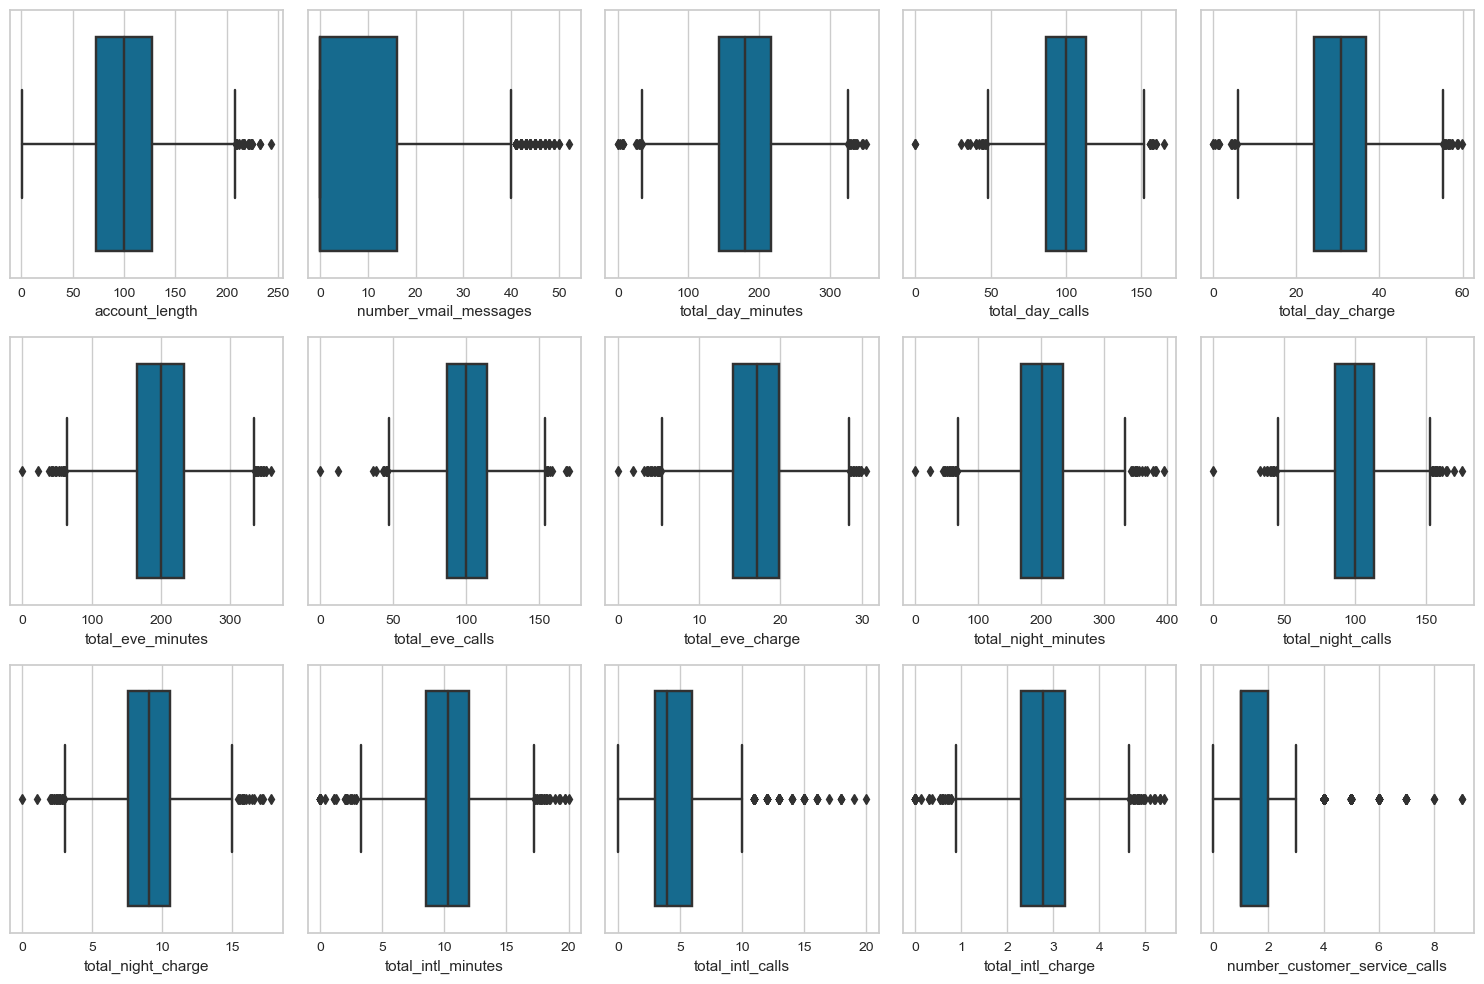

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ganti 'number' atau 'int' sesuai dengan tipe data numerik yang Anda miliki
num = train.select_dtypes(['number', 'int']).columns

# Hitung berapa banyak subplot yang ingin Anda buat
num_subplots = len(num)
num_rows = 5  # Jumlah baris subplot yang Anda inginkan
num_cols = (num_subplots + num_rows - 1) // num_rows  # Menghitung kolom berdasarkan jumlah subplot

plt.figure(figsize=(15, 10))
for i in range(0, num_subplots):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=train, x=train[num[i]])
    plt.tight_layout()

plt.show()


In [51]:
train["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

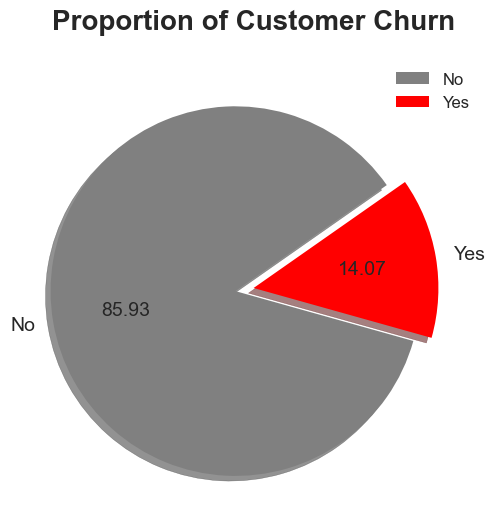

In [52]:
#check proportion of Churn
plt.figure(figsize=(6,6))
plt.pie(
        train["churn"].value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["gray","red"], 
        startangle=35)

plt.title("Proportion of Customer Churn",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

# Feature Engineering

In [53]:
train['total_calls'] = train['total_day_calls'] + train['total_eve_calls'] + train['total_night_calls'] + train['total_intl_calls']
train['total_charge'] = train['total_day_charge'] + train['total_eve_charge'] + train['total_night_charge'] + train['total_night_charge']
train['day_calls_per_charge'] = train['total_day_calls'] / train['total_day_charge']
train['eve_calls_per_charge'] = train['total_eve_calls'] / train['total_eve_charge']
train['night_calls_per_charge'] = train['total_night_calls'] / train['total_night_charge']
train['intl_calls_per_charge'] = train['total_intl_calls'] / train['total_intl_charge']
train = train.fillna(0)
def vmail_call_group(row):
    if row['voice_mail_plan'] == 'yes' and row['number_vmail_messages'] > 0:
        return 'Active Vmail User'
    elif row['voice_mail_plan'] == 'yes' and row['number_vmail_messages'] == 0:
        return 'Vmail Plan User But Not Active'
    else:
        return 'No Vmail Plan'
train['vmail_call_group'] = train.apply(vmail_call_group, axis=1)

def service_calls_group(row):
    if row['number_customer_service_calls'] == 0:
        return 'No Service Calls'
    elif row['number_customer_service_calls'] >= 1 and row['number_customer_service_calls'] <= 3:
        return 'Few Service Calls'
    else:
        return 'Many Service Calls'

train['service_calls_group'] = train.apply(service_calls_group, axis=1)

In [54]:
le = LabelEncoder()
train['churn'] = le.fit_transform(train['churn'])

In [55]:
# Inisialisasi LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['state'] = le.fit_transform(train['state'])
train = pd.get_dummies(train)

# Modelling

In [56]:
X, y = train.drop(columns='churn'), train['churn']
print(X.shape)
print(y.shape)

(4250, 35)
(4250,)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 97.18%
Precision Score : 96.46%
Recall Score : 84.5%
F1 Score : 90.08%


In [22]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(xgb, cv=5, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 8


Optimal number of features: 8


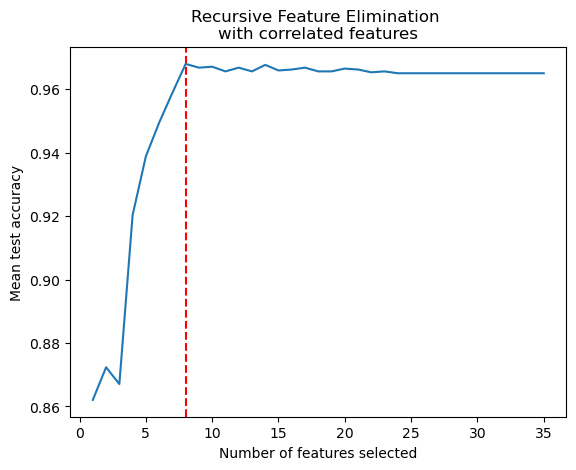

In [28]:
print(f"Optimal number of features: {rfecv.n_features_}")
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
)
plt.axvline(x=rfecv.n_features_, color='red', ls='--')
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
pd.DataFrame({'ranking':rfecv.ranking_}, index=rfecv.feature_names_in_).sort_values('ranking')

,ranking
total_charge,1
international_plan_no,1
number_vmail_messages,1
intl_calls_per_charge,1
number_customer_service_calls,1
total_night_minutes,1
total_intl_calls,1
total_intl_minutes,1
total_day_minutes,2
total_day_calls,3


In [24]:
# list of relevant features
relevant_column = list(X.columns[rfecv.support_])

# Filtering feature from RFE
df_rfe = X[relevant_column]
# Assign target
df_rfe['Churn'] = y
df_rfe

C:\Users\Hp\AppData\Local\Temp\ipykernel_13500\2469369037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe['Churn'] = y


,number_vmail_messages,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_charge,intl_calls_per_charge,international_plan_no,Churn
0,26,254.4,13.7,3,1,66.99,0.810811,1,0
1,0,162.6,12.2,5,0,66.32,1.519757,1,0
2,0,196.9,6.6,7,2,73.88,3.932584,0,0
3,0,186.9,10.1,3,3,57.77,1.098901,0,0
4,24,212.6,7.5,7,3,85.85,3.448276,1,0
...,...,...,...,...,...,...,...,...,...
4245,0,213.7,10.3,6,0,71.97,2.158273,1,0
4246,0,186.2,11.5,6,3,58.15,1.929260,1,0
4247,0,129.1,6.9,7,1,57.05,3.763441,1,0
4248,40,297.5,9.9,5,2,85.81,1.872659,1,0


In [25]:
# Separate features and target
X_rfe = df_rfe.drop('Churn', axis=1)
y_rfe = df_rfe['Churn']

# Separate train and test set for modelling
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)

# Fit classifier
xgb.fit(X_train_rfe, y_train_rfe)

# Predict test set
y_pred_rfe = xgb.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb.score(X_train_rfe, y_train_rfe) * 100), 2)
test_score_rfe = round((xgb.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe = round((precision_score(y_test_rfe, y_pred_rfe)) * 100, 2)
recall_score_rfe = round((recall_score(y_test_rfe, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test_rfe, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score : {}%'.format(recall_score_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 99.91%
Test Accuracy : 96.59%
Precision Score : 92.37%
Recall Score : 84.5%
F1 Score : 88.26%


In [26]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall':[recall_score_def, recall_score_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe'])

,train_acc,test_acc,precision,recall,f1-score
without_rfe,100.00,97.18,96.46,84.5,90.08
with_rfe,99.91,96.59,92.37,84.5,88.26


# 

# Thresholds Adjustment

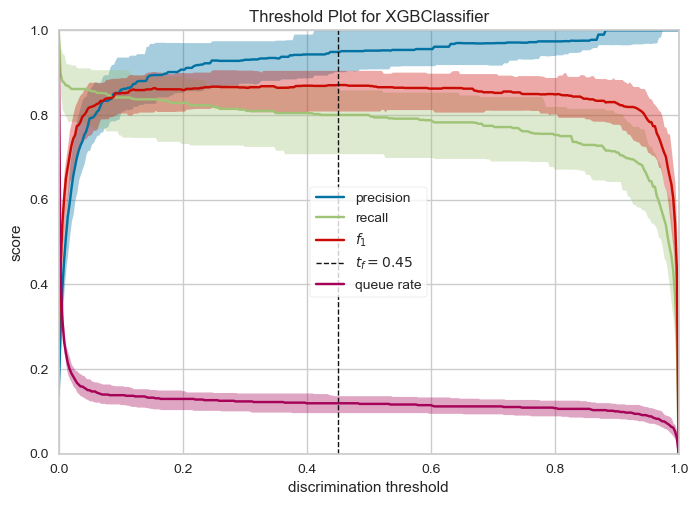

<Axes: title={'center': 'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [29]:
from yellowbrick.classifier import DiscriminationThreshold 
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(xgb)

# Fit the data to the visualizer
visualizer.fit(X_train, y_train)        
# Finalize and render the figure
visualizer.show()   

Dari hasil discrimination threshold diatas didapatkan thresholds paling ideal, yaitu 0.39.
Maka setelah didapatkan thresholds yang optimal, maka thresholds tersebut kita gunakan untuk klasifikasi.

Jika lebih dari nilai tersebut maka termasuk "Churn (1)"
JIka sebaliknya berarti "Not Churn (0)".

In [59]:
# Create dataframe for appying thresholds
y_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_pred_def})
y_pred_final['final_prediction'] = y_pred_final['Churn_Prob'].apply(lambda x: 1 if x > 0.45 else 0)
y_pred_final.head(10)

,Churn,Churn_Prob,final_prediction
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,1,1,1
9,1,1,1


[[717   4]
 [ 20 109]]


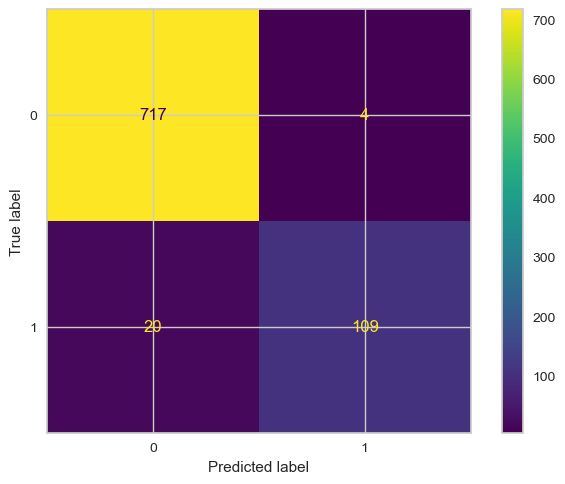

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=xgb.classes_).plot()
plt.show()

In [61]:
# Classification Report
cr = classification_report(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.96      0.84      0.90       129

    accuracy                           0.97       850
   macro avg       0.97      0.92      0.94       850
weighted avg       0.97      0.97      0.97       850



In [62]:
# Model performance after thresholds adjustment
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc_score_th = round(accuracy_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
prec_score_th = round(precision_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
recall_score_th = round(recall_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
f1_th = round(f1_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
pd.DataFrame({
    'accuracy':[test_score_def, acc_score_th],
    'precision':[prec_score_def, prec_score_th],
    'recall':[recall_score_def, recall_score_th],
    'f1-score':[f1_def, f1_th]}, index=['default thresholds', 'thresholds adjusment'])

,accuracy,precision,recall,f1-score
default thresholds,97.18,96.46,84.5,90.08
thresholds adjusment,97.18,96.46,84.5,90.08


# Precision Recall and ROC Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score is : 0.9210721543076477


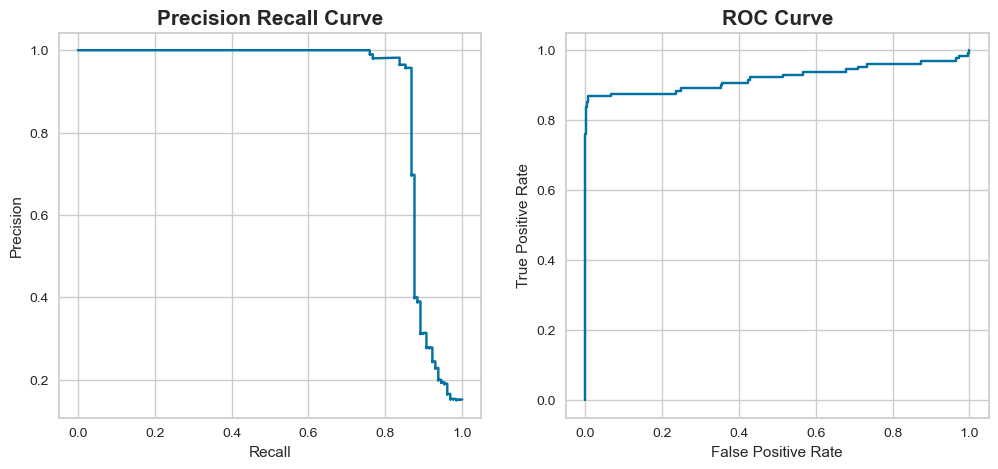

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
y_pred_def = xgb.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred_def, pos_label=xgb.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_def, pos_label=xgb.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
# roc auc score
auc_score = roc_auc_score(y_test, y_pred_def)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

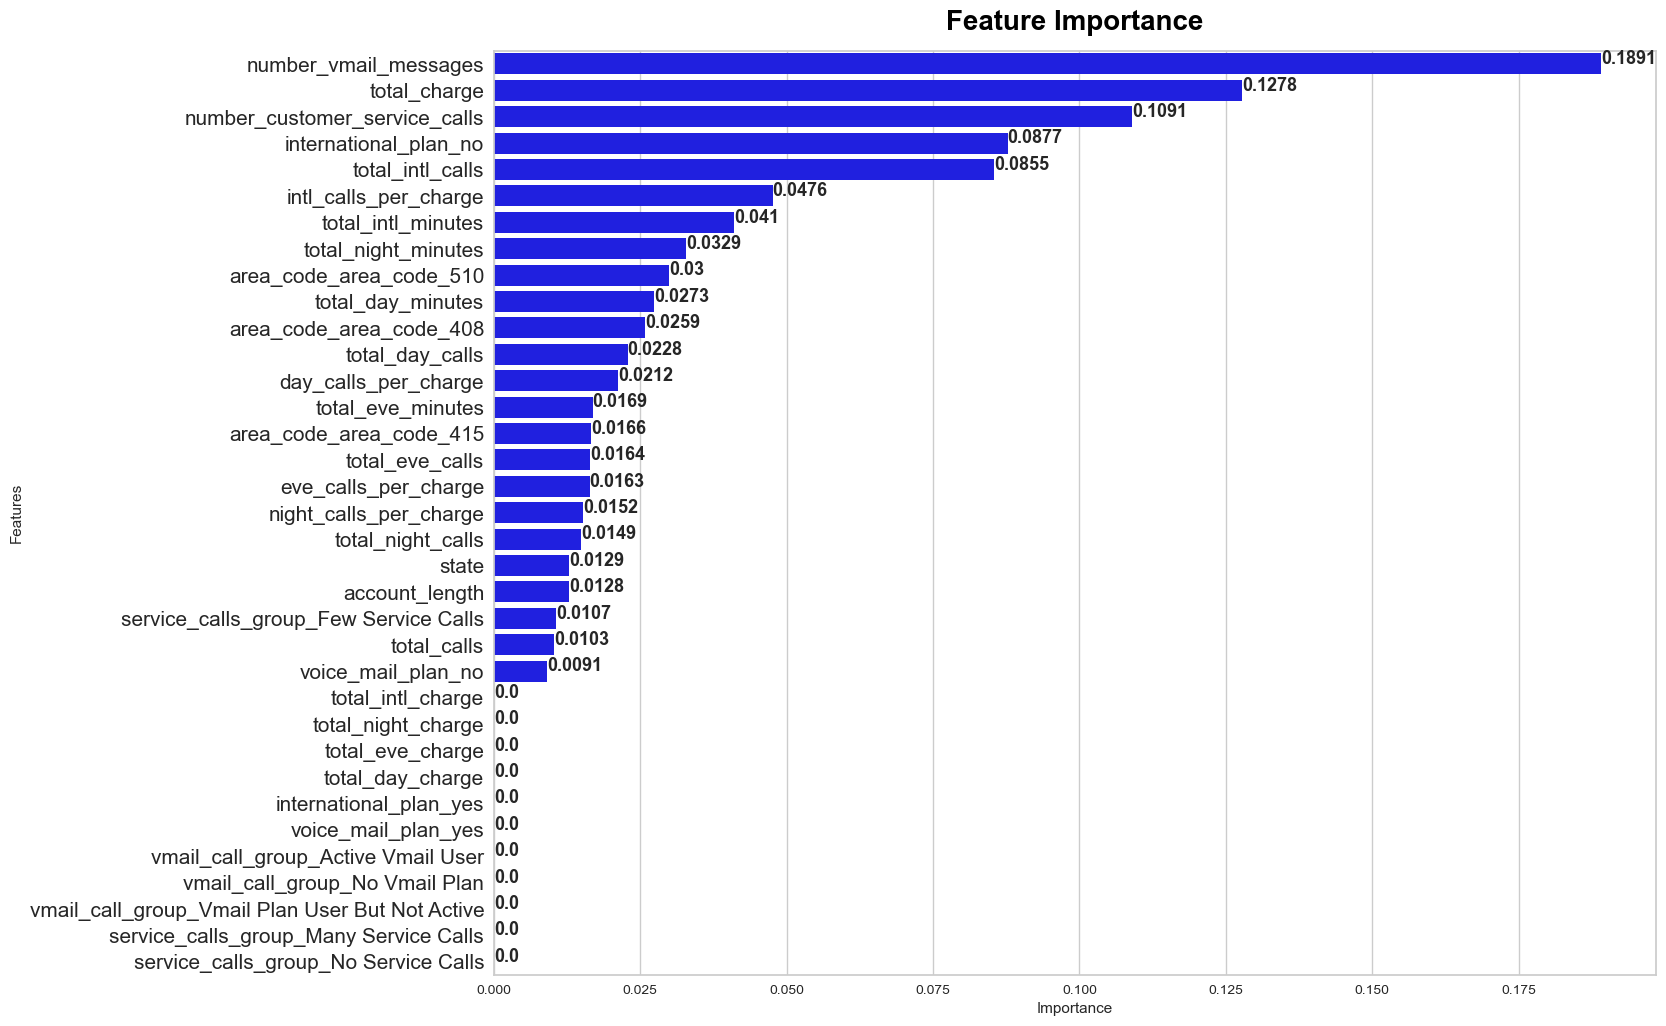

In [66]:
feature_importance = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False)
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='blue')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()